In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'D:\Applied ML learning\datasets\house_pricing\train.csv')
X_train, X_test, y_train, y_test = train_test_split(df, df['SalePrice'], test_size=0.3, random_state=0)

In [2]:
X_train = X_train.reset_index().drop('index',axis=1)
X_train = X_train.select_dtypes(exclude=['object'])
X_train.drop('Id',axis=1,inplace=True)
X_train.drop('SalePrice',axis=1,inplace=True)
X_train = X_train['YearBuilt']
X_train = X_train.values.reshape(-1,1)

In [3]:
X_test = X_test.reset_index().drop('index',axis=1)
X_test = X_test.select_dtypes(exclude=['object'])
X_test.drop('Id',axis=1,inplace=True)
X_test.drop('SalePrice',axis=1,inplace=True)
X_test = X_test['YearBuilt']
X_test = X_test.values.reshape(-1,1)

In [4]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_predicted = reg.predict(X_test)

'plt.xlim(left=40000,right=500000)\nplt.ylim(bottom=40000,top=500000)'

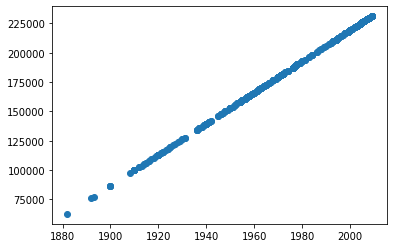

In [5]:
mse = mean_squared_error(y_test, y_predicted)

'''What to output?'''
plt.scatter(X_test, y_predicted)
#plt.plot(y_predicted,y_predicted, color='red')

'''plt.xlim(left=40000,right=500000)
plt.ylim(bottom=40000,top=500000)'''

In [6]:
class MultivariateRegression:
    def __init__(self):
        self.score = 0
        self.coeffs = 0
        self.std = 0
        self.res = 0

    def fit1(self, features, target):
        # .map() or .apply() those loops to make it multivariable
        xy = [features.values.iloc[:,i]*target.values.iloc[:,i] for i in range(len(features.values))]
        x_squared = [x[0]**2 for x in features.values]
        n = len(features.values)

        m = (n*sum(xy)-sum(features.values)*sum(target.values))/(n*sum(x_squared)-(sum(features.values)**2))
        b = ((sum(target.values)-m*sum(features.values))/n)

        y = [(m*x[0]+b) for x in features.values]

        return y

    def fit(self, X, y):
        for i in range(X.shape[1]):
            xy = [X.iloc[:,i].values.iloc[:,i]*y.iloc[:,i].values.iloc[:,i] for i in range(len(X.iloc[:,i].values))]
            x_squared = [x[0]**2 for x in X.iloc[:,i].values]
            n = len(X.values)

            m = (n*sum(xy)-sum(X.iloc[:,i].values)*sum(y.iloc[:,i].values))/(n*sum(x_squared)-(sum(X.iloc[:,i].values)**2))
            b = ((sum(y.iloc[:,i].values)-m*sum(X.iloc[:,i].values))/n)

            y = [(m*x[0]+b) for x in X.iloc[:,i].values]

        return y

    def gradient_descent(x_actual, x_pred, intercept, slope, L=0.01):
        old_intercept = -2(x_actual + (x_pred*slope + intercept))
        step_size = old_intercept*L
        new_intercept = old_intercept-step_size

        step_size_limit = 0.001
        step_num_limit  = 1000
        if step_size >= step_size_limit & 0 >= step_num_limit:
            pass
        
        return 0
    
    def predict(self):
        pass



<>:35: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:35: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
C:\Users\homou\AppData\Local\Temp\ipykernel_7500\2832433701.py:35: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  old_intercept = -2(x_actual + (x_pred*slope + intercept))


In [7]:
X_train = pd.DataFrame(data={'Age':[14,20,34],'Height':[160,177,185],'Sex':[0,1,0]})
X_train['Death'] = [89,70,95]

In [8]:
myreg = MultivariateRegression()
myreg.fit(X_train, y_train)

C:\Users\homou\AppData\Local\Temp\ipykernel_7500\2832433701.py:35: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  old_intercept = -2(x_actual + (x_pred*slope + intercept))
C:\Users\homou\AppData\Local\Temp\ipykernel_7500\2832433701.py:35: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  old_intercept = -2(x_actual + (x_pred*slope + intercept))
C:\Users\homou\AppData\Local\Temp\ipykernel_7500\2832433701.py:35: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  old_intercept = -2(x_actual + (x_pred*slope + intercept))
C:\Users\homou\AppData\Local\Temp\ipykernel_7500\2832433701.py:35: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  old_intercept = -2(x_actual + (x_pred*slope + intercept))
C:\Users\homou\AppData\Local\Temp\ipykernel_7500\2832433701.py:35: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  old_intercept = -2(x_actual + (x_pred*slope + intercept))


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
X_train = pd.DataFrame(data={'Age':[14,20,34],'Height':[160,177,185],'Sex':[0,1,0]})
X_train['Death'] = [89,70,95]

y_train = X_train['Death']
X_train.drop(columns=['Death'], inplace=True)

X_train = X_train.iloc[:,-1:]
X_train

,Sex
0,0
1,1
2,0


In [ ]:
myreg = MultivariateRegression()
myreg.fit(X_train, y_train)

'''y_predicted = myreg.predict()

plt.scatter(X_train, y_train)
plt.plot(y_predicted,y_predicted, color='red')'''


TypeError: apply() got multiple values for argument 'axis'

In [ ]:
import pandas as pd

#df.iloc[0][["Verdict", "Comment", "StartTime", "EndTime", "Duration"]] = ['', '', '', '', '']
df = X_train.iloc[:,:3]
df.iloc[1] = [0,1,2]


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})

for zalupa in df.iterrows():
    zalupa = [0,0,0]

df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0
